# **Data Quality**

### **Dependencies**

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from importlib.machinery import SourceFileLoader
CONSTANTS = SourceFileLoader("CONSTANTS", "../../config/CONSTANTS.py").load_module()

## **Load Data**

In [45]:
df = pd.read_csv("../../src/merged_orgas.csv")

In [46]:
df["client"] = df["orga_abbreviation"]

In [47]:
df.to_csv("../../src/merged_orgas.csv", index=False)

In [48]:
df.head()

,iati_id,iati_orga_id,orga_abbreviation,orga_full_name,title_en,title_other,title_main,country_code_list,country,country_name,...,description_main,status,crs_5_code,crs_5_name,crs_3_code,crs_3_name,title_and_description,sgd_pred_code,sgd_pred_str,client
0,DE-1-201920016-0,DE-1,bmz,Bundesministerium für wirtschaftliche Zusammen...,Strengthening of Metrology for the Improvement...,Stärkung des Messwesens in Ägypten zur Verbess...,Strengthening of Metrology for the Improvement...,['AG'],AG;,Antigua and Barbuda,...,With a rapidly growing population and a promis...,Implementation,14010;,Water sector policy and administrative managem...,140;,Water Supply & Sanitation;,Strengthening of Metrology for the Improvement...,9,"8 9. Build resilient infrastructure, promot...",bmz
1,DE-1-201721877-0,DE-1,bmz,Bundesministerium für wirtschaftliche Zusammen...,Strengthening regional integration and coopera...,Stärkung der regionalen Integration und Zusamm...,Strengthening regional integration and coopera...,NaN,NaN,NaN,...,The module supports intra-regional partnership...,Finalisation,33130;,Regional trade agreements (RTAs);,331;,Trade Policies & Regulations;,Strengthening regional integration and coopera...,9,"8 9. Build resilient infrastructure, promot...",bmz
2,DE-1-201822287-0,DE-1,bmz,Bundesministerium für wirtschaftliche Zusammen...,Strengthening quality infrastructure for trade...,Stärkung der Qualitätsinfrastruktur für den Ha...,Strengthening quality infrastructure for trade...,NaN,NaN,NaN,...,Enhances the efficiency of the SADC Directorat...,Implementation,33130;,Regional trade agreements (RTAs);,331;,Trade Policies & Regulations;,Strengthening quality infrastructure for trade...,9,"8 9. Build resilient infrastructure, promot...",bmz
3,DE-1-197966252,DE-1,bmz,Bundesministerium für wirtschaftliche Zusammen...,NaN,Programm zur Förderung erneuerbarer Energien,Programm zur Förderung erneuerbarer Energien,NaN,NaN,NaN,...,"Ziel der FZ-Maßnahme ist es, die BOAD bei der ...",Finalisation,24030;,Formal sector financial intermediaries;,240;,Banking & Financial Services;,Programm zur Förderung erneuerbarer Energien. ...,4,3 4. Ensure inclusive and equitable quality...,bmz
4,DE-1-199535527,DE-1,bmz,Bundesministerium für wirtschaftliche Zusammen...,Studies and Experts Fund,Studien- und Fachkräftefonds,Studies and Experts Fund,NaN,NaN,NaN,...,Preparation and appraisal of technical coopera...,Finalisation,43010;,Multisector aid;,430;,Other Multisector;,Studies and Experts Fund. Preparation and appr...,9,"8 9. Build resilient infrastructure, promot...",bmz


In [49]:
df.columns

Index(['iati_id', 'iati_orga_id', 'orga_abbreviation', 'orga_full_name',
       'title_en', 'title_other', 'title_main', 'country_code_list', 'country',
       'country_name', 'country_flag', 'description_en', 'description_other',
       'description_main', 'status', 'crs_5_code', 'crs_5_name', 'crs_3_code',
       'crs_3_name', 'title_and_description', 'sgd_pred_code', 'sgd_pred_str',
       'client'],
      dtype='object')

In [50]:
from importlib.machinery import SourceFileLoader
CONSTANTS = SourceFileLoader("CONSTANTS", "../../config/CONSTANTS.py").load_module()

# Merge all organization csv's
def merge_responses():
    combined_df = pd.DataFrame()

    for key, values in CONSTANTS.ORGANIZATIONS.items():
        path = f"../../src/responses/response_{values[1]}.json"

        temp_df = pd.read_json(path)


        combined_df = pd.concat([combined_df, temp_df], ignore_index=True)

    return combined_df

responses_df = merge_responses()
responses_df.head(5)

,sector_code,iati_identifier,title_narrative,reporting_org_ref,sector_vocabulary,activity_status_code,description_narrative,last_updated_datetime,recipient_country_code,title_narrative_xml_lang,description_narrative_xml_lang,recipient_region_code
0,[14010],DE-1-201920016-0,[Strengthening of Metrology for the Improvemen...,DE-1,[1],2,[With a rapidly growing population and a promi...,2024-02-29T00:00:00Z,[AG],"[en, de]","[en, de, en, de]",NaN
1,[33130],DE-1-201721877-0,[Strengthening regional integration and cooper...,DE-1,[1],3,[The module supports intra-regional partnershi...,2024-02-29T00:00:00Z,NaN,"[en, de]","[en, de, en, de]",[679]
2,[33130],DE-1-201022094-0,[Strengthening quality infrastructure for trad...,DE-1,[1],4,[For the domestic markets of the Member States...,2024-02-29T00:00:00Z,NaN,"[en, de]","[en, de, en, de]",[1029]
3,[33130],DE-1-201222975-0,[Strengthening quality infrastructure for trad...,DE-1,[1],4,[The Southern African Development Community (S...,2024-02-29T00:00:00Z,NaN,"[en, de]","[en, de, en, de]",[1029]
4,[33130],DE-1-201522135-0,[Increase in Trade and Consumer Protection in ...,DE-1,[1],4,[The SADC Protocol on Trade forms the legal ba...,2024-02-29T00:00:00Z,NaN,"[en, de]","[en, de, en, de]",[1029]


## **Title & Description Narrative**

In [51]:
df['description_length'] = df['description_main'].apply(lambda x: len(x.split(" ")) if isinstance(x, str) else 0)
df['title_length'] = df['title_main'].apply(lambda x: len(x.split(" ")) if isinstance(x, str) else 0)

In [52]:
grouped = df.groupby('client')['description_length'].apply(list)

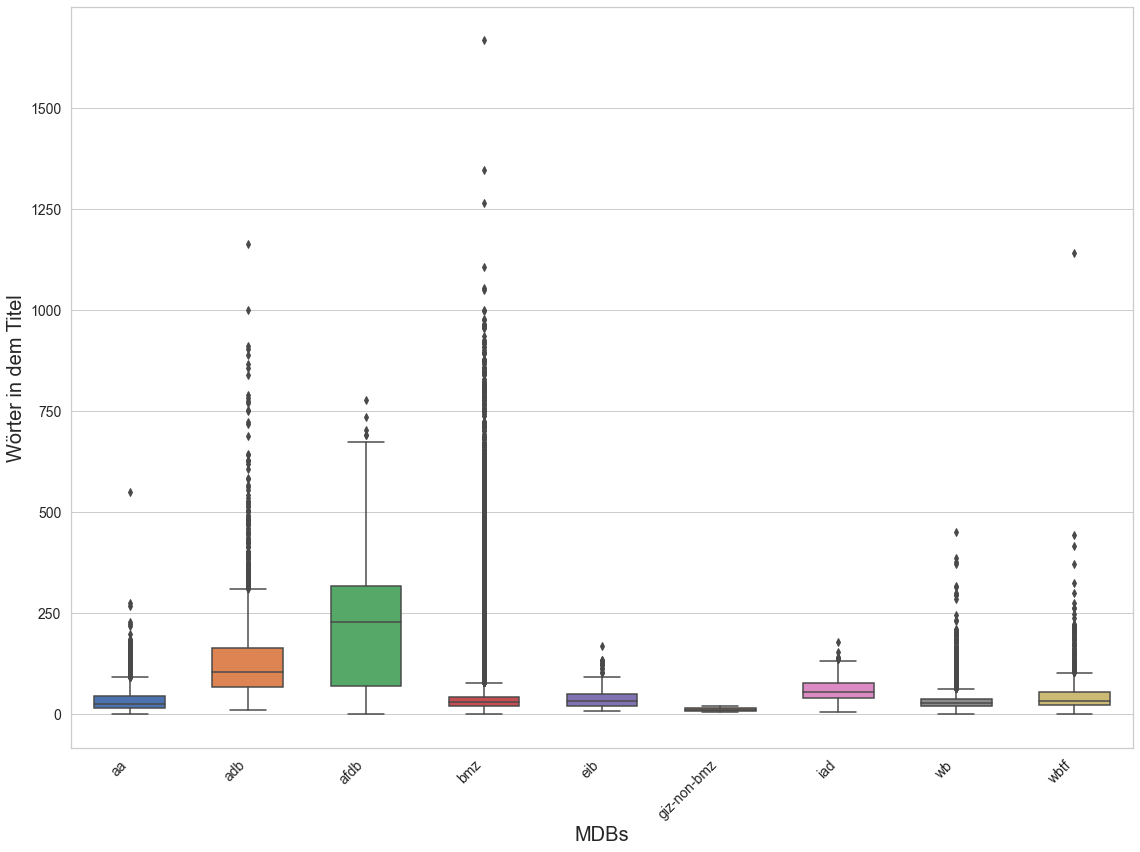

In [53]:
sns.set_style("whitegrid")
plt.figure(figsize=(16, 12))

ax = sns.boxplot(data=grouped, linewidth=1.5, width=0.6, fliersize=5, saturation=1)
ax.set_xticklabels(grouped.keys(), rotation=45, horizontalalignment='right')


palette = sns.color_palette("Set1", len(grouped))
for i, box in enumerate(ax.artists):
    box.set_edgecolor(palette[i])
    box.set_facecolor(sns.utils.desaturate(palette[i], 0.75))
    for j in range(6*i, 6*(i+1)):
        ax.lines[j].set_color(palette[i])

#plt.title('Boxplot of Description Length by Client', fontsize=18, fontweight='bold')
plt.ylabel('Wörter in dem Titel', fontsize=20)
plt.xlabel('MDBs', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.tight_layout()

plt.savefig('../../src/analysis/words_distr_descr.png')
plt.show()

In [54]:
grouped = df.groupby('client')['title_length'].apply(list)

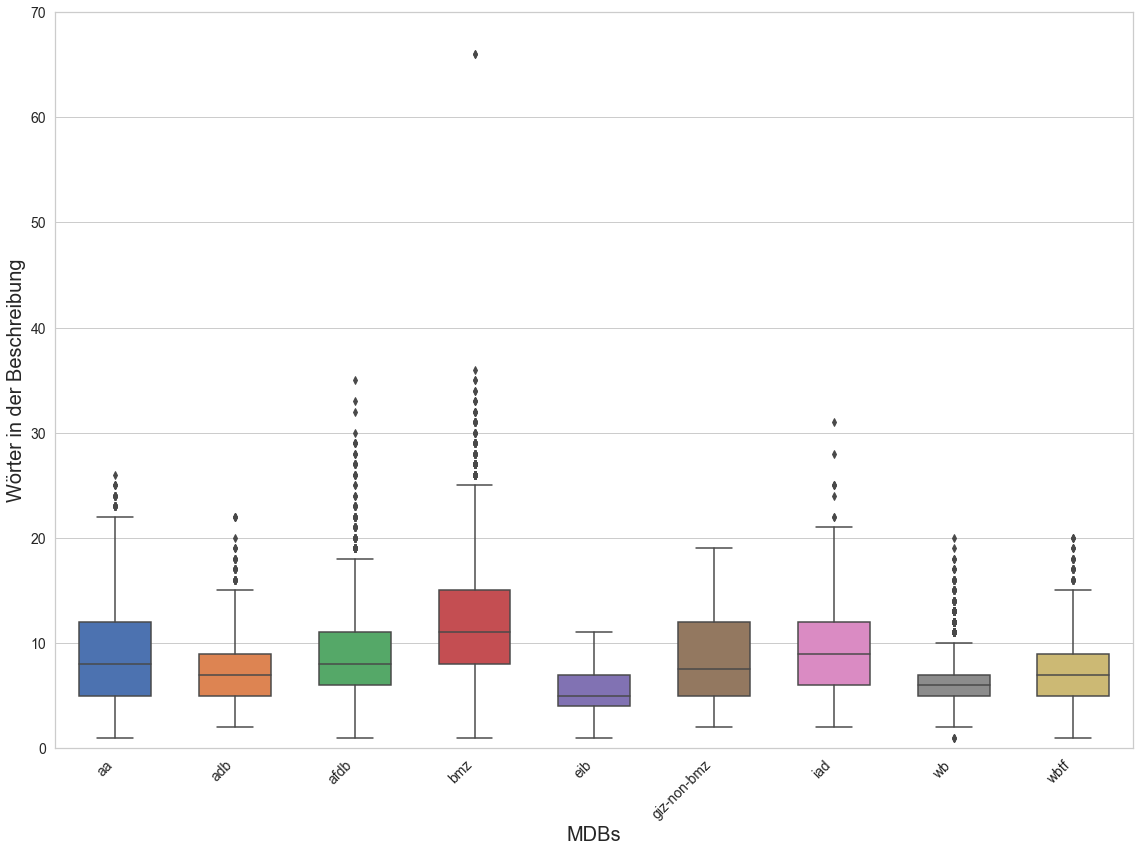

In [55]:
sns.set_style("whitegrid")
plt.figure(figsize=(16, 12))

ax = sns.boxplot(data=grouped, linewidth=1.5, width=0.6, fliersize=5, saturation=1)
ax.set_xticklabels(grouped.keys(), rotation=45, horizontalalignment='right')

palette = sns.color_palette("Set1", len(grouped))
for i, box in enumerate(ax.artists):
    box.set_edgecolor(palette[i])
    box.set_facecolor(sns.utils.desaturate(palette[i], 0.75))
    for j in range(6*i, 6*(i+1)):
        ax.lines[j].set_color(palette[i])

#plt.title('Boxplot of Description Length by Client', fontsize=18, fontweight='bold')
plt.ylabel('Wörter in der Beschreibung', fontsize=20)
plt.xlabel('MDBs', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

#ax.set_facecolor('#f5f5f5')
#plt.setp(ax.artists, edgecolor = 'k', facecolor='#f6f6f6')
#plt.setp(ax.lines, color='k')
ax.set_ylim(bottom=0, top=70)

plt.tight_layout()

plt.savefig('../../src/analysis/words_distr_title.png')
plt.show()

## **Nan-Value Analysis**

In [56]:
IATI_ATTRIBUTES = [
    "iati_identifier",
    "title_narrative",
    "title_narrative_xml_lang",
    "reporting_org_ref",
    "description_narrative_xml_lang",
    "description_narrative",
    "recipient_country_code",
    "recipient_region_code",
    "activity_status_code",
    "last_updated_datetime",
    "sector_code",
    "sector_vocabulary",
]

filtered_columns = [col for col in IATI_ATTRIBUTES if col in responses_df.columns]

responses_df = responses_df[filtered_columns]

In [57]:
responses_df = responses_df.applymap(lambda x: np.nan if x == [] or x == '' else x)

nan_counts = responses_df.isna().sum()
nan_counts

iati_identifier                       0
title_narrative                       0
title_narrative_xml_lang           8688
reporting_org_ref                     0
description_narrative_xml_lang     8688
description_narrative                95
recipient_country_code            10721
recipient_region_code             43244
activity_status_code                  0
last_updated_datetime                 0
sector_code                          27
sector_vocabulary                    27
dtype: int64

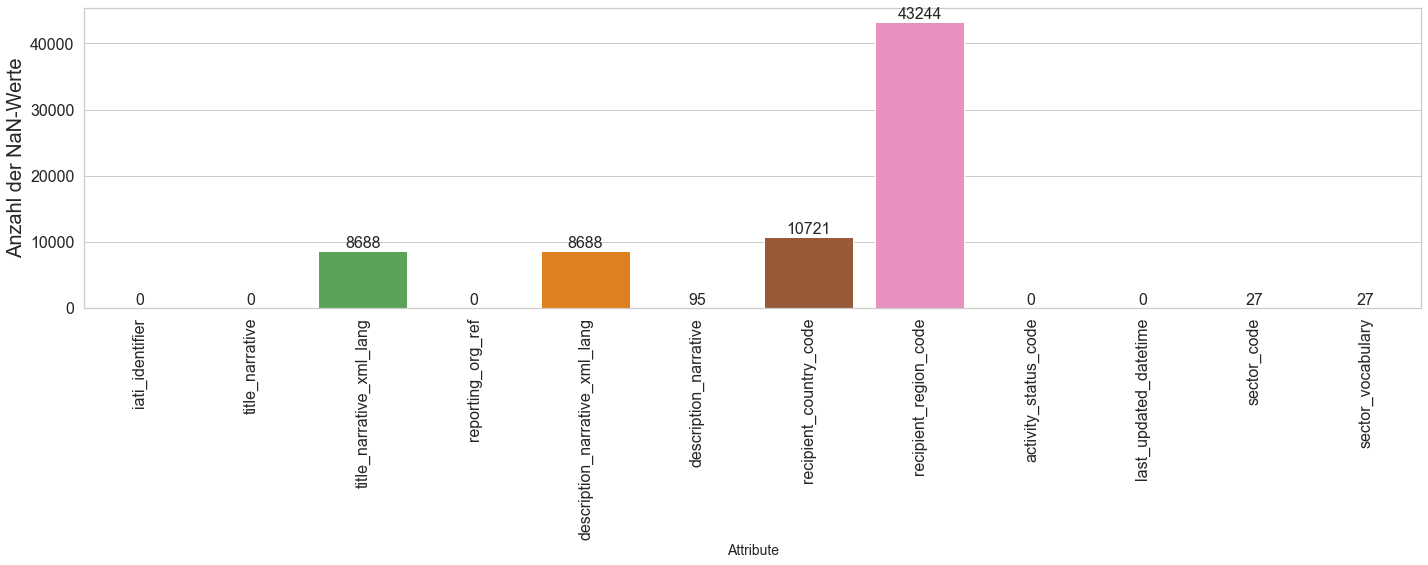

In [58]:
sns.set(style="whitegrid")
plt.figure(figsize=(20, 8))
barplot = sns.barplot(x=nan_counts.index, y=nan_counts.values, palette="Set1")
#plt.title('Count of NaN Values Per Column with Seaborn')
plt.xlabel('Attribute', fontsize=14)
plt.ylabel('Anzahl der NaN-Werte', fontsize=20)
plt.xticks(rotation=90, fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

for index, value in enumerate(nan_counts.values):
    plt.text(index, value, f'{value}', ha='center', va='bottom', fontsize=16)

plt.tight_layout()

plt.savefig('../../src/analysis/nan_values.png')
plt.show()

## **Sector Vocabulary**

In [59]:
responses_df["sector_vocabulary"]

0                            [1]
1                            [1]
2                            [1]
3                            [1]
4                            [1]
                  ...           
53990                        [1]
53991                        [1]
53992                        [1]
53993    [1, 10, 10, 10, 10, 10]
53994                        [1]
Name: sector_vocabulary, Length: 53995, dtype: object

In [60]:
codes = {
    "1": 0,
    "2": 0,
    "10": 0
    }

In [61]:
count = 0
index = 0
orgas_without_crs5 = []

for sector_list in responses_df["sector_vocabulary"].dropna(): 
    index += 1
    if "1" not in sector_list:
        count += 1
        orgas_without_crs5.append(responses_df.iloc[index]["reporting_org_ref"])

orgas_without_crs5


['XM-DAC-918-3',
 'XM-DAC-918-3',
 'XM-DAC-918-3',
 'XM-DAC-918-3',
 'XM-DAC-918-3',
 'XM-DAC-918-3',
 'XM-DAC-918-3',
 'XM-DAC-918-3',
 'XM-DAC-918-3',
 'XM-DAC-918-3',
 'XM-DAC-918-3',
 'XM-DAC-918-3',
 'XM-DAC-918-3',
 'XM-DAC-918-3',
 'XM-DAC-918-3',
 'XM-DAC-918-3',
 'XM-DAC-918-3',
 'XM-DAC-918-3',
 'XM-DAC-918-3',
 'XM-DAC-918-3',
 'XM-DAC-918-3',
 'XM-DAC-918-3',
 'XM-DAC-918-3',
 'XM-DAC-918-3',
 'XM-DAC-918-3',
 'XM-DAC-918-3',
 'XM-DAC-918-3',
 'XM-DAC-918-3',
 'XM-DAC-918-3',
 'XM-DAC-918-3',
 'XM-DAC-918-3',
 'XM-DAC-918-3',
 'XM-DAC-918-3',
 'XM-DAC-918-3',
 'XM-DAC-918-3',
 'XM-DAC-918-3',
 'XM-DAC-918-3',
 'XM-DAC-918-3',
 'XM-DAC-918-3',
 'XM-DAC-918-3',
 'XM-DAC-918-3',
 'XM-DAC-918-3',
 'XM-DAC-918-3',
 'XM-DAC-918-3',
 'XM-DAC-918-3',
 'XM-DAC-918-3',
 'XM-DAC-918-3',
 'XM-DAC-918-3',
 'XM-DAC-918-3',
 'XM-DAC-918-3',
 'XM-DAC-918-3',
 'XM-DAC-918-3',
 'XM-DAC-918-3',
 'XM-DAC-918-3',
 'XM-DAC-918-3',
 'XM-DAC-918-3',
 'XM-DAC-918-3',
 'XM-DAC-918-3',
 'XM-DAC-918-3

In [62]:
from collections import Counter
orgas_without_crs5_counts = Counter(orgas_without_crs5)

for org_ref, count in orgas_without_crs5_counts.items():
    print(f"{org_ref}: {count}")

XM-DAC-918-3: 721
44000: 664


In [63]:
df[df["iati_id"] == "DE-1-202221729"]

,iati_id,iati_orga_id,orga_abbreviation,orga_full_name,title_en,title_other,title_main,country_code_list,country,country_name,...,crs_5_code,crs_5_name,crs_3_code,crs_3_name,title_and_description,sgd_pred_code,sgd_pred_str,client,description_length,title_length
5508,DE-1-202221729,DE-1,bmz,Bundesministerium für wirtschaftliche Zusammen...,Just Transition - Economic Incentives for Succ...,Just Transition - Ökonomische Anreize für erfo...,Just Transition - Economic Incentives for Succ...,['MA'],MA;,Morocco,...,15110; 32110; 41010;,Public sector policy and administrative manage...,151; 321; 410;,Government & Civil Society-general; Industry; ...,Just Transition - Economic Incentives for Succ...,13,12 13. Take urgent action to combat climate...,bmz,26,12
